head dataset
            MYPOMSTPO  Brent  Palm_oil
Date                                  
04.01.2016        105    104     537.5
05.01.2016        104    104     540.0
06.01.2016        104    102     535.0
07.01.2016        105    101     530.0
08.01.2016        106    101     535.0
tail dataset
            MYPOMSTPO  Brent  Palm_oil
Date                                  
17.12.2018        106    101     485.0
18.12.2018        104    103     497.5
19.12.2018        104    100     505.0
20.12.2018        102    102     502.5
21.12.2018        103    101     497.5
24.12.2018        102    102     495.0
26.12.2018        100    101     495.0
27.12.2018        100    101     495.0
28.12.2018        101    101     495.0
31.12.2018        100    101     495.0
values.shape  (729, 3)
[[105.  104.  537.5]
 [104.  104.  540. ]
 [104.  102.  535. ]
 [105.  101.  530. ]
 [106.  101.  535. ]]


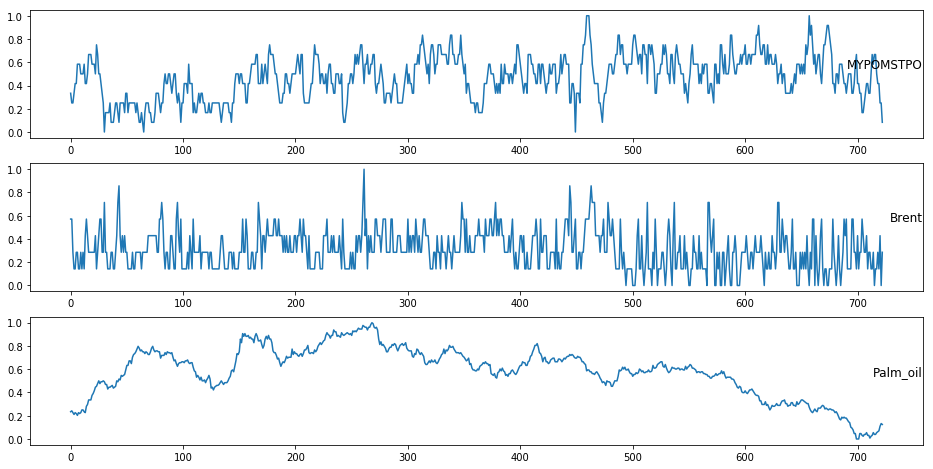

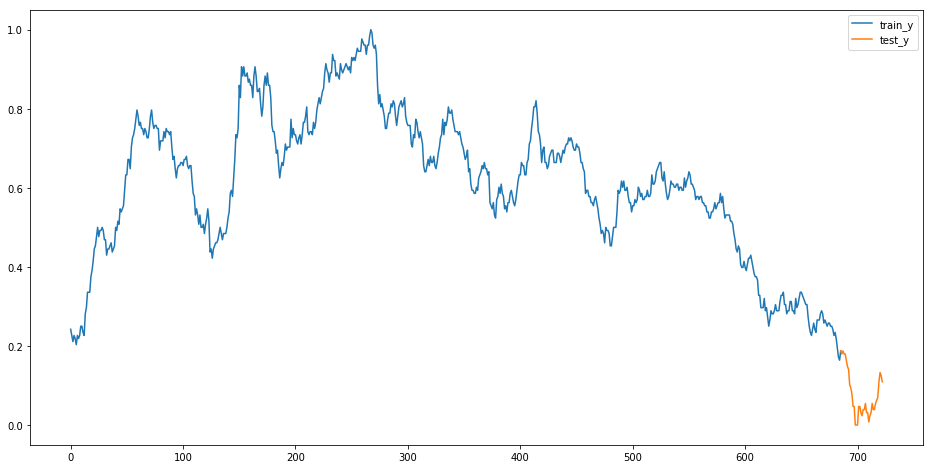

train_X.shape (686, 5)
train_X.shape, train_y.shape, test_X.shape, test_y.shape:
(686, 1, 5) (686,) (38, 1, 5) (38,)
last_6_scaled
[[0.23076916 0.1428566  0.109375  ]
 [0.15384626 0.28571415 0.1015625 ]
 [0.         0.1428566  0.1015625 ]
 [0.         0.1428566  0.1015625 ]
 [0.07692289 0.1428566  0.1015625 ]
 [0.         0.1428566  0.1015625 ]] 

last_7_scaled
[[0.5        0.1428566  0.0546875 ]
 [0.41666698 0.28571415 0.0625    ]
 [0.41666698 0.1428566  0.0703125 ]
 [0.25       0.4285717  0.109375  ]
 [0.25       0.         0.1328125 ]
 [0.08333302 0.28571415 0.125     ]
 [0.16666698 0.1428566  0.109375  ]] 



In [10]:
import matplotlib 
#matplotlib.use("GTK")
from math import sqrt
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error 
import keras as k
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
import os

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True): 
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1): 
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)] 
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i)) 
        if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)] 
    # put it all together
    agg = concat(cols, axis=1)
    
    agg.columns = names
     #drop rows with NaN values 
    if dropnan:
        agg.dropna(inplace=True) 
    return agg

# load dataset
os.chdir('/Users/konovalov.mihail/Documents/Palm_forecast/NN')
dataset = read_csv('dataqq.csv', header=0, index_col=0, sep=';')


dataset['Palm_oil'].replace(0, np.nan, inplace=True) 
#dataset['Palm_oil'].fillna(method='bfill', inplace=True) 
dataset['Palm_oil'].interpolate(method='linear', axis=0).ffill().bfill()

dataset.dropna(axis=0, inplace=True) 

print('head dataset')
print(dataset.head())

print('tail dataset')
print(dataset.tail(10))

values = dataset.values
print('values.shape ', values.shape)
print(values[:5, :])

orig_price = values[:, -1]

# integer encode values in text format
#encoder = LabelEncoder()
#values[:,3] = encoder.fit_transform(values[:,3])

# ensure all data is float
values = values.astype('float32')

scalers = MinMaxScaler(feature_range=(0, 1))
scaleds = scalers.fit_transform(values)

values = values[:-5 or None]

#scaled = values

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

#reframed = series_to_supervised(scaled[:-5, :], 1, 1) 

#last_20_scaled = scaled[-20:, :]
last_6_scaled = scaleds[-6:, :]
last_7_scaled = scaled[-7:,:]

#print('scaled')
#print(scaled[5:, :], '\n')

#invert = scaler.inverse_transform(scaled)

# frame as supervised learning
#####################################################################################


reframed = series_to_supervised(scaled, 1, 1) 

#####################################################################################


#last_7_scaled = scaled[-7:,:]

#print('last_6_scaled')
#print(last_6_scaled[:, :], '\n')

#print('reframed head')
#print(reframed.head())

#print('reframed tail')
#print(reframed.tail())

#reframed = reframed.reindex(['var1(t)','var2(t)','var3(t)','var1(t-1)','var2(t-1)','v
#reframed = reframed.reindex([3,4,5,0,1,2], axis=1)
#0 1 2 3 4 5
#print('reframed.head')
#print(reframed.head())

# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
#print('reframed_head after drop:')
#print(reframed.head())

# split into train and test sets
values = reframed.values 
#print('len values') 
#print(values.shape) 
#print(len(values[0, :])) 
#print(len(values[:, 0]))

# specify columns to plot
groups = [0, 1, 2]
i = 1
# plot each column 
pyplot.figure(figsize=(16,8)) 
for group in groups:
        pyplot.subplot(len(groups), 1, i)
        pyplot.plot(values[:, group])
        pyplot.title(dataset.columns[group], y=0.5, loc='right')
        i += 1
pyplot.show()

#for i in range(len(values[0, :])):

#    pyplot.plot(values[:, i])
#    pyplot.show()

#####################################################################################

n_train = int(0.95 * len(values[:, 0])) 

#####################################################################################

#print('n_train, len - n_train')
#print(n_train, len(values[:, 0]) - n_train)

train = values[:n_train, :]
test = values[n_train -1 :, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1] 
test_X, test_y = test[:, :-1], test[:, -1]

nan_train_y = [np.nan for _ in range(n_train - 1)]

train_test_y = np.append(nan_train_y, np.array(test_y), axis = 0)

#arr = np.append(arr, np.array([[1,2,3]]), axis=0)

#plot train_y, test_y
pyplot.figure(figsize=(16,8))

plot_train_y = pyplot.plot(train_y, label='train_y')
#pyplot.title('train_y', y=0.5, loc='left')

plot_train_test_y = pyplot.plot(train_test_y, label='test_y') 
#pyplot.title('train_y', y=0.5, loc='right')

pyplot.legend()
pyplot.show()

print('train_X.shape', train_X.shape) 
#print(train_X[0,:])

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print('train_X.shape, train_y.shape, test_X.shape, test_y.shape:')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#print('test_X first 5 lines')
#print(test_X[:5, :], '\n')

#head dataset
#print('test_y')
#for i in range(0, len(test_y)): print(i, test_y[i], '\n')
print('last_6_scaled') 
print(last_6_scaled[:,:], '\n')

print('last_7_scaled') 
print(last_7_scaled[:,:], '\n')

In [11]:
# design network

print('train_X.shape[1], train_X.shape[2]')
print((train_X.shape[1], train_X.shape[2]))

model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))                                                   
model.add(Dense(1))
#model.add(Dense(80, activation='relu'))

#model.add(Activation('sigmoid')) 
#model.add(Activation('relu'))
model.add(Activation('tanh'))
                                                       
#opt = k.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#print(opt)
                                                       
#model.compile(loss='mae', optimizer='SGD') 
#model.compile(loss='mae', optimizer='Adadelta')
#model.compile(loss='mae', optimizer='Adagrad') 
#model.compile(loss='mae', optimizer='RMSprop')
model.compile(loss='mae', optimizer='Adam')

# fit network
history = model.fit(train_X, train_y, epochs=250, batch_size=2, verbose=1, shuffle=False)

    
print('Model training: Done')

train_X.shape[1], train_X.shape[2]
(1, 5)
Epoch 1/250
686/686 [==============================] - 6s 9ms/step - loss: 0.1298
Epoch 2/250
686/686 [==============================] - 3s 4ms/step - loss: 0.1062
Epoch 3/250
686/686 [==============================] - 3s 4ms/step - loss: 0.1078
Epoch 4/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0990
Epoch 5/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0950
Epoch 6/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0896
Epoch 7/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0790
Epoch 8/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0766
Epoch 9/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0704
Epoch 10/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0666
Epoch 11/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0634
Epoch 12/250
686/686 [==============================] 

686/686 [==============================] - 3s 4ms/step - loss: 0.0242
Epoch 100/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0237
Epoch 101/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0236
Epoch 102/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0237
Epoch 103/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0224
Epoch 104/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0225
Epoch 105/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0235
Epoch 106/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0234
Epoch 107/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0228
Epoch 108/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0228
Epoch 109/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0225
Epoch 110/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0229
Epoch 

686/686 [==============================] - 3s 4ms/step - loss: 0.0203
Epoch 197/250
686/686 [==============================] - 3s 5ms/step - loss: 0.0200
Epoch 198/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0206
Epoch 199/250
686/686 [==============================] - 3s 5ms/step - loss: 0.0202
Epoch 200/250
686/686 [==============================] - 3s 5ms/step - loss: 0.0200
Epoch 201/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0199
Epoch 202/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0201
Epoch 203/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0203
Epoch 204/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0201
Epoch 205/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0204
Epoch 206/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0199
Epoch 207/250
686/686 [==============================] - 3s 4ms/step - loss: 0.0203
Epoch 

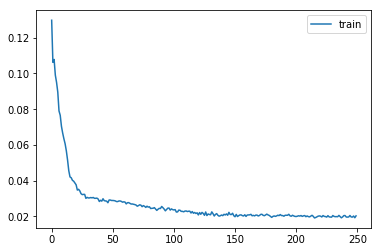

Test RMSE: 15.737


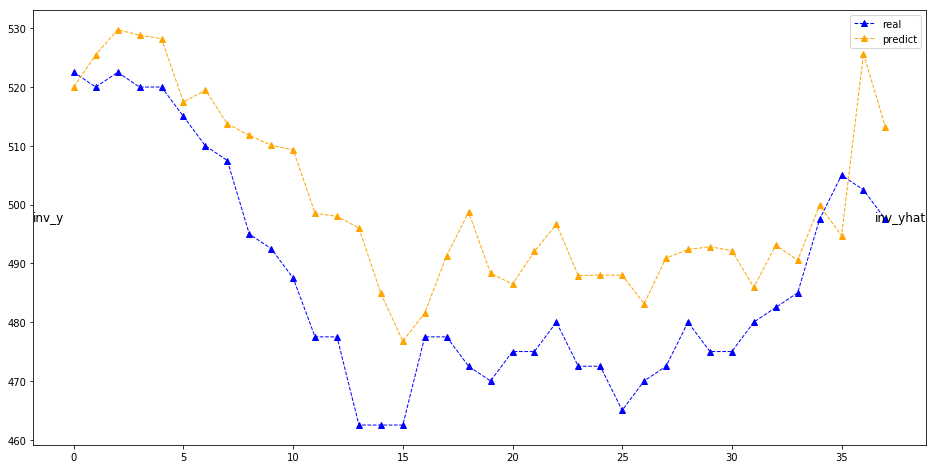

In [12]:
# plot history
pyplot.plot(history.history['loss'], label='train') 
#pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

#print('test_X head')
#print(test_X[:5, :])

# make a prediction
yhat = model.predict(test_X)

#print('yhat shape', yhat.shape)
#pyplot.figure(figsize=(16,8))
#plot_test_y = pyplot.plot(test_y, label='test_y')
#pyplot.title('test_y', y=0.5, loc='left')
#plot_yhat = pyplot.plot(yhat, label='yhat')
#pyplot.title('yhat', y=0.5, loc='right')
#pyplot.show()

#print('test_y len', len(test_y))
#print('yhat len', len(yhat))
#for i in range(0, len(test_y)): print(i, test_y[i], '\t', yhat[i], '\n')

reshaped_test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#print('reshaped_test_X')
#print('reshaped_test_X.shape ', reshaped_test_X.shape)
#print(reshaped_test_X[0:5, :])

# invert scaling for actual
reshaped_test_y = test_y.reshape((len(test_y), 1))
inv_y = DataFrame(concatenate((reshaped_test_X[:, :-1], reshaped_test_y[:]), axis=1))

# invert scaling for forecast
inv_yhat = DataFrame(concatenate((reshaped_test_X[:, :-1], yhat), axis=1)) 

#print(inv_yhat[:5])

inv_y.drop(inv_y.columns[:-3], axis=1, inplace=True)

#print('inv_y.shape ', inv_y.shape)

inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

inv_yhat.drop(inv_yhat.columns[:-3], axis=1, inplace=True) 

inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat)) 
print('Test RMSE: %.3f' % rmse)

fig = pyplot.figure(figsize=(16,8))
plot_inv_y = pyplot.plot(inv_y, label='real')

pyplot.title('inv_y', y=0.5, loc='left')
pyplot.setp(plot_inv_y, color = 'blue', marker = '^', linestyle = '--', linewidth = 1)

plot_inv_yhat = pyplot.plot(inv_yhat, label='predict')
pyplot.setp(plot_inv_yhat, color = 'orange', marker = '^', linestyle = '--', linewidth = 1)
pyplot.title('inv_yhat', y=0.5, loc='right')
pyplot.legend()
            
pyplot.show()
            
#diff = inv_y - inv_yhat

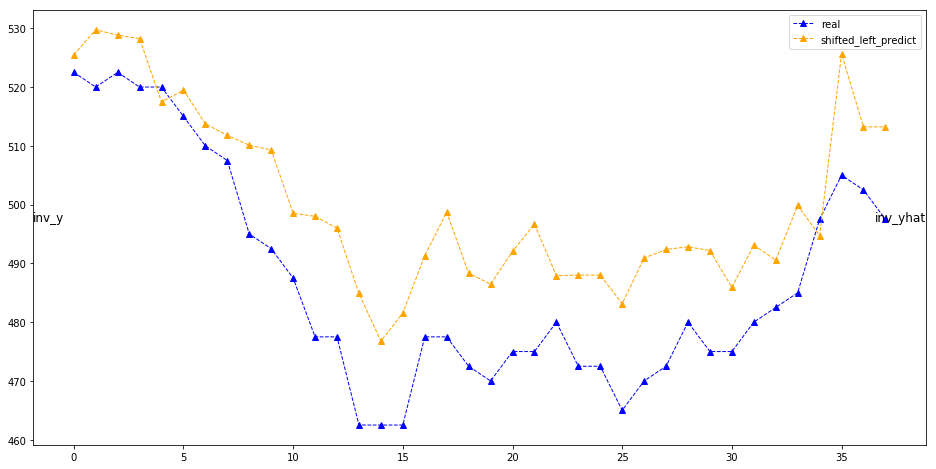

Test RMSE: 15.737
Shifted left RMSE: 14.682


In [13]:
#shifted_right_inv_yhat = []
#shifted_right_inv_yhat.append(inv_yhat[0]) 
#shifted_right_inv_yhat.append(inv_yhat[0])
#for i in range(0, len(inv_yhat) - 1): shifted_right_inv_yhat.append(inv_yhat[i])

shifted_left_inv_yhat = []
#shifted_right_inv_yhat.append(inv_yhat[0])
for i in range(1, len(inv_yhat) - 1): shifted_left_inv_yhat.append(inv_yhat[i]) 
shifted_left_inv_yhat.append(inv_yhat[len(inv_yhat) - 1]) 
shifted_left_inv_yhat.append(inv_yhat[len(inv_yhat) - 1])

#print('inv_yhat shape', inv_yhat.shape)
#fig = pyplot.figure(figsize=(16,8))
#plot_inv_y = pyplot.plot(inv_y, label='real')
#pyplot.title('inv_y', y=0.5, loc='left')
#pyplot.setp(plot_inv_y, color = 'blue', marker = '^', linestyle = '--', linewidth = 1
            
#plot_inv_yhat = pyplot.plot(shifted_right_inv_yhat, label='shift_right_predict')
#pyplot.setp(plot_inv_yhat, color = 'orange', marker = '^', linestyle = '--', linewidt
#pyplot.title('inv_yhat', y=0.5, loc='right')
#pyplot.legend()

#pyplot.show()

fig = pyplot.figure(figsize=(16,8))
plot_inv_y = pyplot.plot(inv_y, label='real')
pyplot.title('inv_y', y=0.5, loc='left')
pyplot.setp(plot_inv_y, color = 'blue', marker = '^', linestyle = '--', linewidth = 1)
plot_inv_yhat = pyplot.plot(shifted_left_inv_yhat, label='shifted_left_predict')
pyplot.setp(plot_inv_yhat, color = 'orange', marker = '^', linestyle = '--', linewidth = 1)
pyplot.title('inv_yhat', y=0.5, loc='right')
            
pyplot.legend()
            
pyplot.show()
            
# calculate RMSE
#shifted_right_rmse = sqrt(mean_squared_error(inv_y, shifted_right_inv_yhat)) 
shifted_left_rmse = sqrt(mean_squared_error(inv_y, shifted_left_inv_yhat)) 
print('Test RMSE: %.3f' % rmse)
#print('Shifted right RMSE: %.3f' % shifted_right_rmse)
print('Shifted left RMSE: %.3f' % shifted_left_rmse)

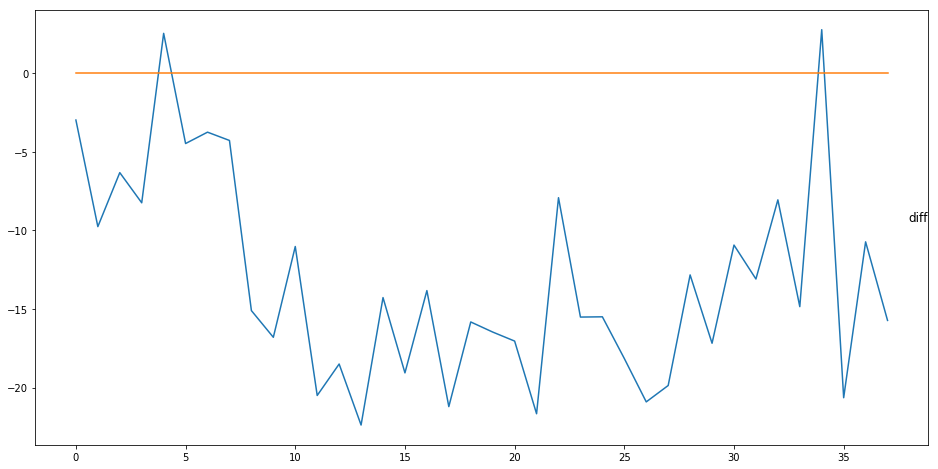

In [14]:
#pyplot.figure(figsize=(16,8)) 
#pyplot.title('y', y=0.5, loc='right') 
#pyplot.plot(inv_y)
#pyplot.show()

#pyplot.figure(figsize=(16,8))
#pyplot.title('yhat', y=0.5, loc='right')
#pyplot.plot(inv_yhat)
#pyplot.show()

diff = inv_y - shifted_left_inv_yhat

zero =[]
for i in range(len(diff)): zero.append(0)
    
pyplot.figure(figsize=(16,8))
pyplot.title('diff', y=0.5, loc='right')
pyplot.plot(diff)
pyplot.plot(zero)
pyplot.show()

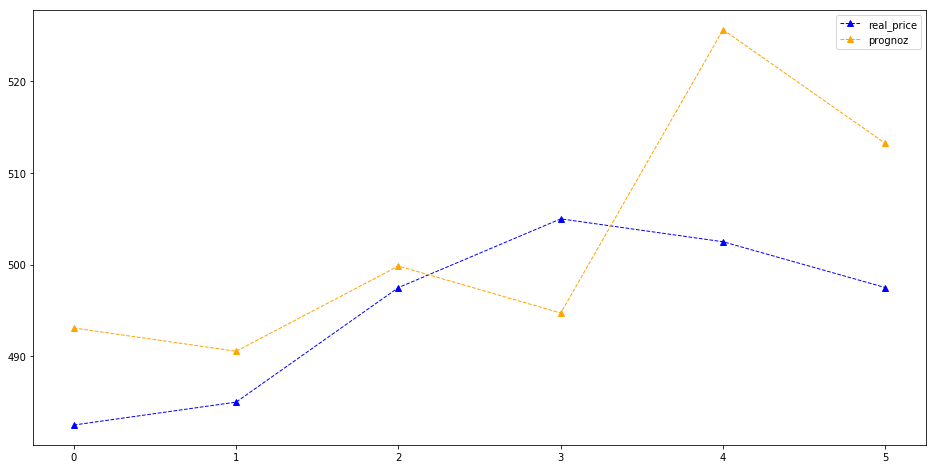

last_6_scaled
[[0.23076916 0.1428566  0.109375  ]
 [0.15384626 0.28571415 0.1015625 ]
 [0.         0.1428566  0.1015625 ]
 [0.         0.1428566  0.1015625 ]
 [0.07692289 0.1428566  0.1015625 ]
 [0.         0.1428566  0.1015625 ]]


In [15]:
fig = pyplot.figure(figsize=(16,8))
plot_inv_y = pyplot.plot(inv_y[-6:], label='real_price')
#pyplot.title('prognoz', y=0.5, loc='left')
pyplot.setp(plot_inv_y, color = 'blue', marker = '^', linestyle = '--', linewidth = 1)

plot_inv_yhat = pyplot.plot(inv_yhat[-6:], label='prognoz')
pyplot.setp(plot_inv_yhat, color = 'orange', marker = '^', linestyle = '--', linewidth = 1)
#pyplot.title('inv_yhat', y=0.5, loc='right')
            
pyplot.legend()
            
pyplot.show()
            
print('last_6_scaled')
print(last_6_scaled)
        

last_real_day  :  0.109375
predicted_day_1:  [[0.15688258]]
predicted_day_2:  [[0.1746343]]
predicted_day_3:  [[0.24834593]]
predicted_day_4:  [[0.2951445]]
predicted_day_5:  [[0.32116532]]
[497.49999259 512.70241927 518.38296595 541.97068837 556.94623117
 565.27289502]


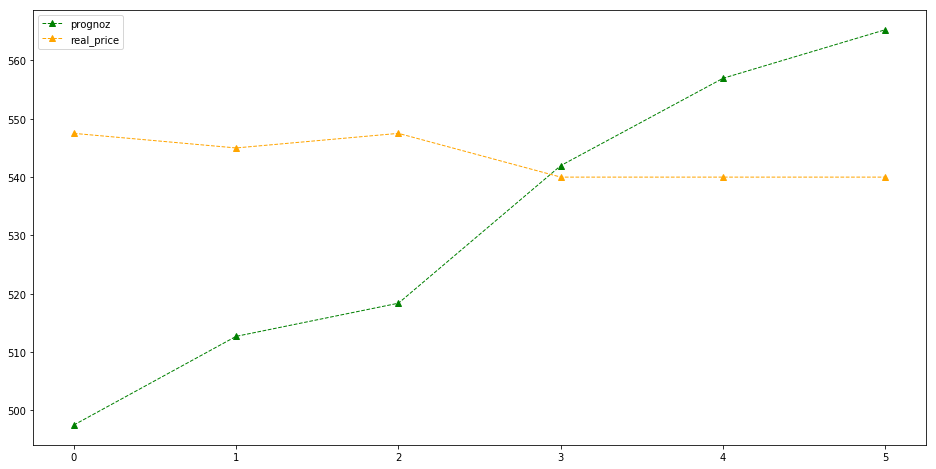

In [16]:
#to predict struct var1(t-1) var2(t-1) var3(t-1) var1(t) var2(t) 
#to_predict = np.array([0.86837655, 0.6002213, 0.8096264, 0.16229151, 0.35633743]) 
to_predict = np.array([last_6_scaled[0, 0], last_6_scaled[0, 1], last_6_scaled[0, 2], last_6_scaled[1, 0], last_6_scaled[1, 1]])

#day_1
to_predict = to_predict.reshape(1, 5)
to_predict_reshaped = to_predict.reshape((to_predict.shape[0], 1, to_predict.shape[1]))
predicted_day_1 = model.predict(to_predict_reshaped)

#day_2
to_predict = np.array([last_6_scaled[1, 0], last_6_scaled[1, 1], predicted_day_1[0], last_6_scaled[2, 0], last_6_scaled[2, 1]])
to_predict = to_predict.reshape(1, 5)
to_predict_reshaped = to_predict.reshape((to_predict.shape[0], 1, to_predict.shape[1]))
predicted_day_2 = model.predict(to_predict_reshaped)
#day_3
to_predict = np.array([last_6_scaled[2, 0], last_6_scaled[2, 1], predicted_day_2[0], last_6_scaled[3, 0], last_6_scaled[3, 1]])
to_predict = to_predict.reshape(1, 5)
to_predict_reshaped = to_predict.reshape((to_predict.shape[0], 1, to_predict.shape[1]))
predicted_day_3 = model.predict(to_predict_reshaped)

#day_4
to_predict = np.array([last_6_scaled[3, 0], last_6_scaled[3, 1], predicted_day_3[0], last_6_scaled[4, 0], last_6_scaled[4, 1]])
to_predict = to_predict.reshape(1, 5)
to_predict_reshaped = to_predict.reshape((to_predict.shape[0], 1, to_predict.shape[1]))
predicted_day_4 = model.predict(to_predict_reshaped)
                                         
#day_5
to_predict = np.array([last_6_scaled[4, 0], last_6_scaled[4, 1], predicted_day_4[0], last_6_scaled[5, 0], last_6_scaled[5, 1]])
to_predict = to_predict.reshape(1, 5)
to_predict_reshaped = to_predict.reshape((to_predict.shape[0], 1, to_predict.shape[1]))
predicted_day_5 = model.predict(to_predict_reshaped)
                                         
print('last_real_day  : ', last_6_scaled[0, 2])
print('predicted_day_1: ', predicted_day_1)
print('predicted_day_2: ', predicted_day_2)
print('predicted_day_3: ', predicted_day_3)
print('predicted_day_4: ', predicted_day_4)
print('predicted_day_5: ', predicted_day_5)
                                         
to_scale_back = list()
                                         
to_scale_back.append([last_6_scaled[0, 0], last_6_scaled[0, 1], last_6_scaled[0, 2]])
to_scale_back.append([last_6_scaled[1, 0], last_6_scaled[1, 1], float(predicted_day_1[0])])
to_scale_back.append([last_6_scaled[2, 0], last_6_scaled[2, 1], float(predicted_day_2[0])])
to_scale_back.append([last_6_scaled[3, 0], last_6_scaled[3, 1], float(predicted_day_3[0])])
to_scale_back.append([last_6_scaled[4, 0], last_6_scaled[4, 1], float(predicted_day_4[0])])
to_scale_back.append([last_6_scaled[5, 0], last_6_scaled[5, 1], float(predicted_day_5[0])])
    
#to_scale_back = to_scale_back.reshape(5, 3)
    
to_scale_back = DataFrame(to_scale_back) 
    
#to_scale_back.head()
    
to_scale_back_values = to_scale_back.values
    
inv_prognoz = scaler.inverse_transform(to_scale_back_values) 

print(inv_prognoz[:, 2])

zero =[]
for i in range(len(inv_prognoz)): zero.append(inv_prognoz[0, 2])

real_price = [547.5, 545, 547.5, 540, 540, 540] 

#pyplot.figure(figsize=(16,8))
#plot_prognoz = pyplot.title('diff', y=0.5, loc='right')

#pyplot.plot(diff)
#pyplot.plot(zero)
#pyplot.show()

fig = pyplot.figure(figsize=(16,8))
plot_prognoz = pyplot.plot(inv_prognoz[:, 2], label='prognoz') 
#pyplot.title('prognoz', y=0.5, loc='left')
pyplot.setp(plot_prognoz, color = 'green', marker = '^', linestyle = '--', linewidth = 1)

plot_zero = pyplot.plot(real_price, label='real_price')
pyplot.setp(plot_zero, color = 'orange', marker = '^', linestyle = '--', linewidth = 1)
#pyplot.title('inv_yhat', y=0.5, loc='right')

pyplot.legend()
    
pyplot.show()